<a href="https://colab.research.google.com/github/A-Rodano/A-Rodano/blob/main/Data_from_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to load and explore data from the CYGNO Cloud
Info about the cygno library [here](https://github.com/CYGNUS-RD/cygno)

First of all we need some libraries, so let's install them (quietly with `-q` , delete it if you need to see the installation status)

In [83]:
!pip install -U git+https://git@github.com/dodas-ts/boto3sts -q
!pip install git+https://github.com/CYGNUS-RD/cygno.git -U -q
!pip install 'https://github.com/CYGNUS-RD/middleware/blob/master/midas/midaslib.tar.gz?raw=t!rue' -q

Now we import what we need

In [84]:
import midas.file_reader
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import cygno as cy
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

**In order to access the data** we need to use the `open_mid()` function from the `cygno` library, using the flags: \\
`path='/tmp/'` , `cloud=True` and `tag='STD'`. \\

Moreover the parameter `run` has to be set to the last integer number of the dataset name (e.g.: if the dataset is named ' run00002.mid.gz ' we'll use `run=2`)

Saw a special event
Mean


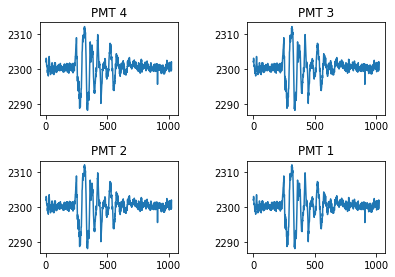

In [85]:
# mean pedestal (Run 21)

P1 = P2 = P3 = P4 = np.zeros(1024)

mfile = cy.open_mid(run=21, path='/tmp/', cloud=True, tag='STD', verbose=False) 

event_count = 0
for event in mfile:
    if event_count == 10 : break # se no buona fortuna a vedere 40k file
    if event.header.is_midas_internal_event():
        print("Saw a special event")
        continue

    bank_names = ", ".join(b.name for b in event.banks.values())
    #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
    #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
    #print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))


    for bank_name, bank in event.banks.items(): 
        if bank_name=='DGH0': # PMTs waveform !!! the interesting loop is this !!!
            header = cy.daq_dgz2header(bank)
            #print (header) # output -> (1,32,1024) ≡ 1 digitalizzatore, 32 canali, 1024 lunghezza

            # this is the way we store the data: waveform has 32 channels, 
            # but the interesting ones are 0 (aka the trigger) and 1,2,3,4 (aka the 4 PMTs) 
            waveform = cy.daq_dgz2array(event.banks['DIG0'], header) 

            P1 = np.sum([P1, waveform[1]], axis=0)
            P2 = np.sum([P2, waveform[2]], axis=0)
            P3 = np.sum([P3, waveform[3]], axis=0)
            P4 = np.sum([P4, waveform[4]], axis=0)

            if event_count%5000==0:
              t = np.linspace(0, header[2], header[2])
            #   fig, ax = plt.subplots(2,2)
            #   ax[0,0].plot(t, waveform[1])
            #   ax[0,1].plot(t, waveform[2])
            #   ax[1,0].plot(t, waveform[3])
            #   ax[1,1].plot(t, waveform[4])
            #   plt.show()
            event_count+=1

P1_mean = P1/event_count
P2_mean = P2/event_count
P3_mean = P3/event_count
P4_mean = P4/event_count
    
print("Mean")

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, P1_mean)
axs[0, 0].set_title('PMT 4')
axs[0, 1].plot(t, P1_mean)
axs[0, 1].set_title('PMT 3')
axs[1, 0].plot(t, P1_mean)
axs[1, 0].set_title('PMT 2')
axs[1, 1].plot(t, P1_mean)
axs[1, 1].set_title('PMT 1')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)



Saw a special event
Mean


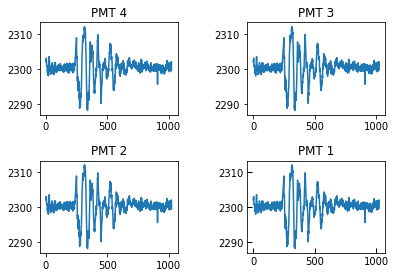

Saw a special event
Mean


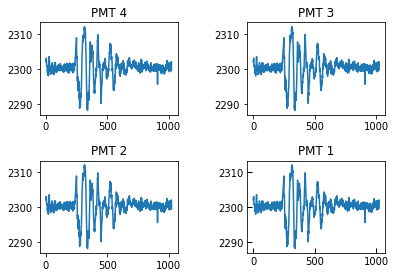

Saw a special event
Mean


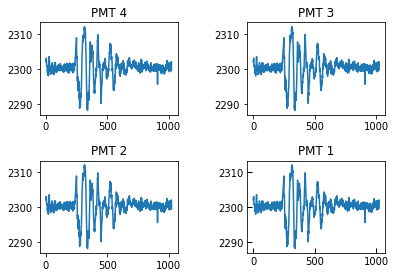

Saw a special event
Mean


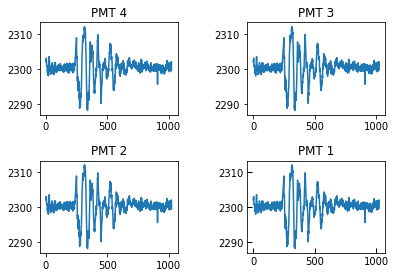

Saw a special event
Mean


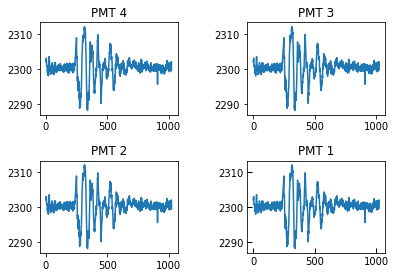

Saw a special event
Mean


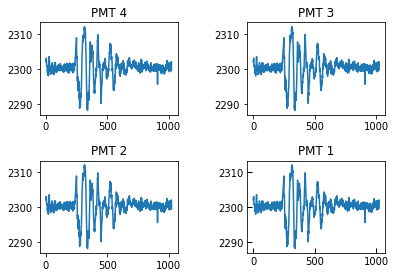

Saw a special event
Mean


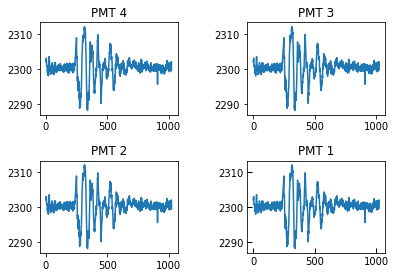

Saw a special event
Mean


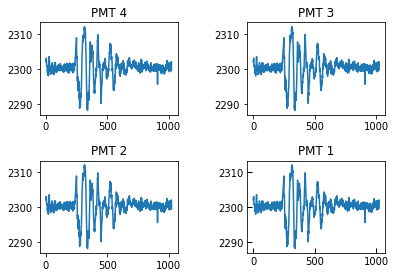

Saw a special event
Mean


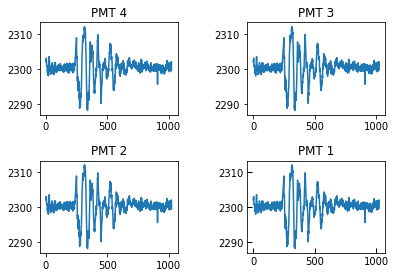

In [89]:
# mean di ogni run

pmts=[]

for nrun in range(22,31):


  pmt1 = pmt2 = pmt3 = pmt4 = np.zeros(1024)

  mfile = cy.open_mid(nrun, path='/tmp/', cloud=True, tag='STD', verbose=False) 

  event_count = 0
  for event in mfile:
      if event_count == 100 : break # se no buona fortuna a vedere 40k file
      if event.header.is_midas_internal_event():
          print("Saw a special event")
          continue

      bank_names = ", ".join(b.name for b in event.banks.values())
      #print("Event # %s of type ID %s contains banks %s" % (event.header.serial_number, event.header.event_id, bank_names))
      #print("Received event with timestamp %s containing banks %s" % (event.header.timestamp, bank_names))
      #print("%s, banks %s" % (datetime.utcfromtimestamp(event.header.timestamp).strftime('%Y-%m-%d %H:%M:%S'), bank_names))
    
      for bank_name, bank in event.banks.items(): 
          if bank_name=='DGH0': # PMTs waveform !!! the interesting loop is this !!!
              header = cy.daq_dgz2header(bank)
              #print (header) # output -> (1,32,1024) ≡ 1 digitalizzatore, 32 canali, 1024 lunghezza

              # this is the way we store the data: waveform has 32 channels, 
              # but the interesting ones are 0 (aka the trigger) and 1,2,3,4 (aka the 4 PMTs) 
              waveform = cy.daq_dgz2array(event.banks['DIG0'], header) 

              pmt1 = np.sum([pmt1, waveform[1]], axis=0)
              pmt2 = np.sum([pmt2, waveform[2]], axis=0)
              pmt3 = np.sum([pmt3, waveform[3]], axis=0)
              pmt4 = np.sum([pmt4, waveform[4]], axis=0)

              if event_count%5000==0:
                t = np.linspace(0, header[2], header[2])
                # fig, ax = plt.subplots(2,2)
                # ax[0,0].plot(t, waveform[1])
                # ax[0,1].plot(t, waveform[2])
                # ax[1,0].plot(t, waveform[3])
                # ax[1,1].plot(t, waveform[4])
                # plt.show()
              event_count+=1

  pmt1 = pmt1/event_count
  pmt2 = pmt2/event_count
  pmt3 = pmt3/event_count
  pmt4 = pmt4/event_count
  
  pmts.append([nrun, pmt1,pmt2,pmt3,pmt4])
  print("Mean")

  fig, axs = plt.subplots(2, 2)
  axs[0, 0].plot(t, P1_mean)
  axs[0, 0].set_title('PMT 4')
  axs[0, 1].plot(t, P1_mean)
  axs[0, 1].set_title('PMT 3')
  axs[1, 0].plot(t, P1_mean)
  axs[1, 0].set_title('PMT 2')
  axs[1, 1].plot(t, P1_mean)
  axs[1, 1].set_title('PMT 1')
  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.5, 
                      hspace=0.5)
  plt.tick_params(axis="both", direction='in', which="both", length=5, width=1, colors='k',
                grid_color='grey')

  plt.show()

In [ ]:
# run - pedestal

Vdts=[]

for nrun in range(len(pmts)):
  Vdt1 =  pmts[nrun][1]-P1_mean
  Vdt2 =  pmts[nrun][2]-P2_mean
  Vdt3 =  pmts[nrun][3]-P3_mean
  Vdt4 =  pmts[nrun][4]-P4_mean
  
  Vdts.append([ pmts[nrun][0], Vdt1,Vdt2,Vdt3,Vdt4])
  fig, ax = plt.subplots(2,2)
  ax[0,0].plot(t, Vdt1)
  ax[0,1].plot(t, Vdt2)
  ax[1,0].plot(t, Vdt3)
  ax[1,1].plot(t, Vdt4)

  ax[0,0].grid()
  ax[0,1].grid()
  ax[1,0].grid()
  ax[1,1].grid()

  plt.show()

In [ ]:
# integrazione + divisione per 50 + heatmap

Qs=[]

for nrun in range(len(Vdts)):
  Qpmt4 = np.trapz((Vdts[nrun][1][250:550])/50)
  Qpmt3 = np.trapz((Vdts[nrun][2][250:550])/50)
  Qpmt2 = np.trapz((Vdts[nrun][3][250:550])/50)
  Qpmt1 = np.trapz((Vdts[nrun][4][250:550])/50)

  Qs.append([ Vdts[nrun][0], Qpmt4,Qpmt3,Qpmt2,Qpmt1])

index = ['2','3','4','5','6','7','8','9','10']
df = pd.DataFrame(Qs, columns=['nrun','Qpmt4','Qpmt3','Qpmt2','Qpmt1'], index = index)

plt.figure(figsize = (10,5))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]*10e-12, annot=True)
plt.show()

In [ ]:
Qs[5]

In [ ]:
tot = []

for i in range(1,len(Qs)):
     tot = np.sum([tot, Qs[0]], axis=0)

print(tot)

In [ ]:
Qmax = np.array(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]).max()
Qmin = np.array(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']]).min()

norm = ((Qmin)/1)
norm,Qmax,Qmin

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(df[['Qpmt4','Qpmt3','Qpmt2','Qpmt1']][0:9]/norm,cmap="RdYlBu_r",annot_kws={"size": 16}, fmt=".0%",annot=True)

plt.show()

In [ ]:
run =[22,25,27,28]
for i in range(22,31):
  print(i)


In [ ]:
runs =[22,25,27,28]
pos= ['a','b','c','d']
for i ,run in enumerate(runs):
  print(i,run,pos[i],runs[i])


In [ ]:
pmts=[]

for i in range(1,10):
  j=7*i
  pmts.append([i,j])

print(pmts)